In [1]:
# Import 
from dilution_clean_dat import * # Source code
from __future__ import division    # Solve problem of division in Python2

%matplotlib inline

In [32]:
# Global vars
REPLICA = '1'
STRAIN = 'DivAnc'
MEDIA = 'SC3'
#MEDIA = 'SC7'
NEUTRAL = 'HO'
BNSIZE = 1*(10**5)
BCID_REF = [325789, 325791]

In [33]:
x = Dilution(REPLICA, STRAIN, MEDIA, BCID_REF, NEUTRAL,BNSIZE) # class Dilution
x.read_files()
x.get_experimental_s()
x.runs()


1882
1294


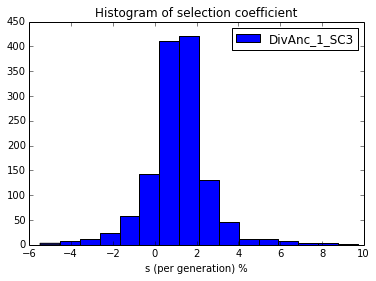

N 1294
Width 0.0303
Mean 0.01155

1364


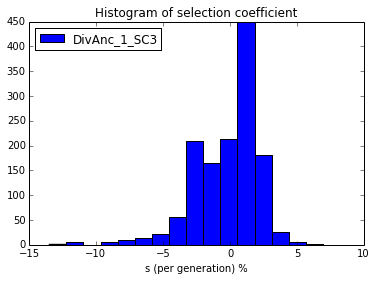

N 1364
Width 0.0473
Mean -0.00224



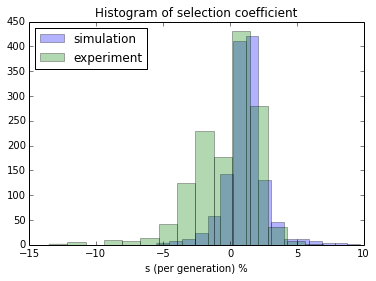

In [34]:
print len(x.pvals)

x.plot_s_dist(x.s_record) #simulation
x.plot_s_dist(x.s_slope) # experiment
# plot together
UPBOUND, s_plot = x.sort_s_for_plot(x.s_record)
UPBOUND2, s_plot2 = x.sort_s_for_plot(x.s_slope)
plt.figure()
s_percent = [100*s_plot[i] for i in range(0,UPBOUND)]
s_percent2 = [100*s_plot2[i] for i in range(0,UPBOUND2)]
plt.hist(s_percent, 16, label = 'simulation', alpha=0.3)
plt.hist(s_percent2, 15, label= 'experiment', alpha=0.3)
plt.title('Histogram of selection coefficient')
plt.xlabel('s (per generation) %')
plt.legend(loc="best")
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


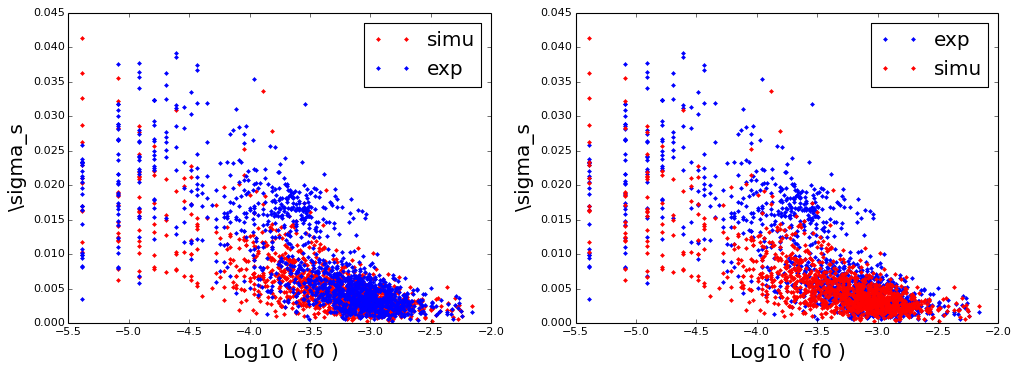

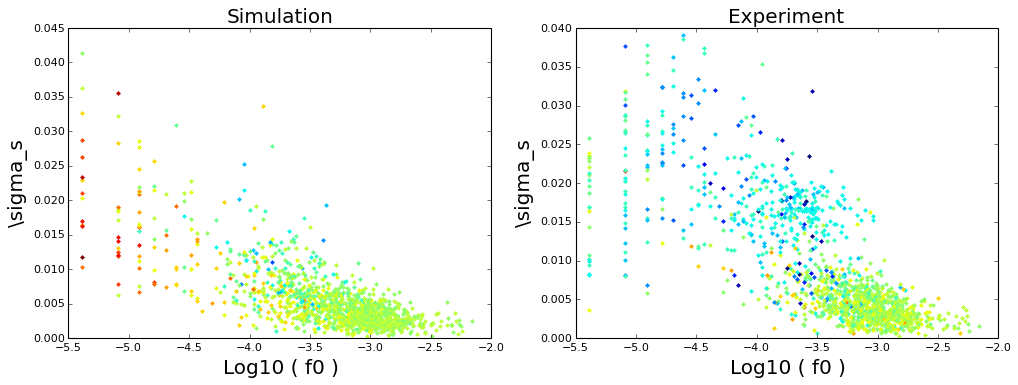

In [35]:
# plot s_std(experimental) to initial freq
exp_ini_freq = x.s_inifreq
exp_end_freq = x.s_endfreq
exp_s = x.s_slope
exp_s_err = x.s_stderr

# plot s_std to initial freq
plt.figure(num=None, figsize=(15, 5), dpi=80)
plt.plot([2,1,3])
plt.subplot(121)
plt.plot(np.log10(x.pvals),x.s_record_std,'r.',label='simu')
plt.xlabel('Log10 ( f0 )', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.plot(np.log10(exp_ini_freq),exp_s_err,'.',label='exp')
#a = [b*(1-b) for b in exp_ini_freq]
#plt.plot(np.log10(exp_ini_freq),a,'k')
plt.legend(loc="best", fontsize=18)
plt.subplot(122)
plt.plot(np.log10(exp_ini_freq),exp_s_err,'.',label='exp')
plt.plot(np.log10(x.pvals),x.s_record_std,'r.',label='simu')
plt.xlabel('Log10 ( f0 )', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.legend(loc="best", fontsize=18)


# plot s_std to initial freq
plt.figure(num=None, figsize=(15, 5), dpi=80)
plt.plot([2,1,3])
plt.subplot(121)
col = plt.cm.jet(np.linspace(0,1,20)) 
for i in range(0,len(x.pvals)):
    s = x.s_record[i]
    if np.isnan(s)==0:
        cidx = int( (((0.1+s)>0)&((-0.1+s)<0))*(0.1+s)*100+ ((-0.1+s)>=0)*10)
        log10f0 = np.log10(x.pvals[i])
        s_std = x.s_record_std[i]
        plt.plot(log10f0,s_std,color=col[cidx], marker='.')
plt.xlabel('Log10 ( f0 )', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.title('Simulation', fontsize=18)
plt.subplot(122)
for i in range(0,len(exp_ini_freq)):
    s = exp_s[i]
    if np.isnan(s)==0:
        cidx = int( (((0.1+s)>0)&((-0.1+s)<0))*(0.1+s)*100+ ((-0.1+s)>=0)*10)
        log10f0 = np.log10(exp_ini_freq[i])
        s_std = exp_s_err[i]
        plt.plot(log10f0,s_std,color=col[cidx], marker='.')
plt.xlabel('Log10 ( f0 )', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.title('Experiment', fontsize=18)
#plt.show()



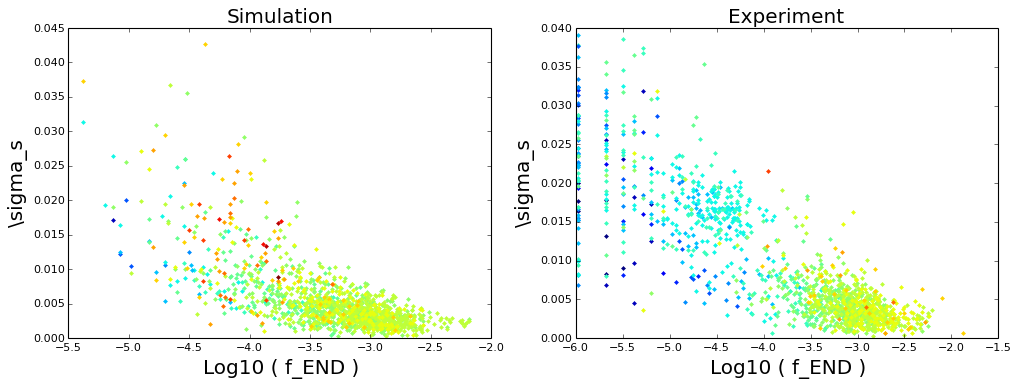

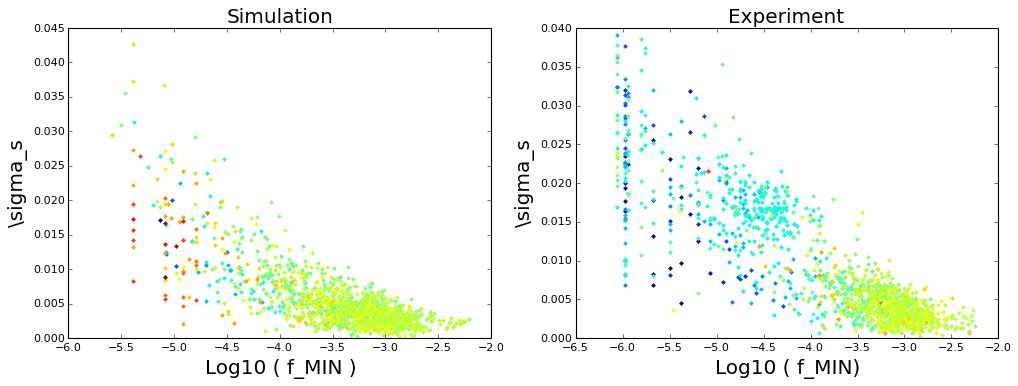

In [23]:
# plot s_std to final freq
plt.figure(num=None, figsize=(15, 5), dpi=80)
plt.plot([2,1,3])
plt.subplot(121)
col = plt.cm.jet(np.linspace(0,1,20)) 
for i in range(0,len(x.simu_reads[4])):
    s = x.s_record[i]
    if np.isnan(s)==0:
        cidx = int( (((0.1+s)>0)&((-0.1+s)<0))*(0.1+s)*100+ ((-0.1+s)>=0)*10)
        log10f1 = np.log10(x.simu_reads[4][i]/float(x.all_count[4]))
        s_std = x.s_record_std[i]
        plt.plot(log10f1,s_std,color=col[cidx], marker='.')
plt.xlabel('Log10 ( f_END )', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.title('Simulation', fontsize=18)
plt.subplot(122)
for i in range(0,len(exp_ini_freq)):
    s = exp_s[i]
    if np.isnan(s)==0:
        cidx = int( (((0.1+s)>0)&((-0.1+s)<0))*(0.1+s)*100+ ((-0.1+s)>=0)*10)
        log10f1 = np.log10(exp_end_freq[i])
        s_std = exp_s_err[i]
        plt.plot(log10f1,s_std,color=col[cidx], marker='.')
plt.xlabel('Log10 ( f_END )', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.title('Experiment', fontsize=18)



# plot s_std to minimum freq
plt.figure(num=None, figsize=(15, 5), dpi=80)
plt.plot([2,1,3])
plt.subplot(121)
col = plt.cm.jet(np.linspace(0,1,20)) 
for i in range(0,len(x.simu_reads[4])):
    s = x.s_record[i]
    if np.isnan(s)==0:
        cidx = int( (((0.1+s)>0)&((-0.1+s)<0))*(0.1+s)*100+ ((-0.1+s)>=0)*10)
        freq = [x.simu_reads[gen][i]/float(x.all_count[gen]) for gen in range(0,5)]
        log10f1 = np.log10(np.min(freq))
        s_std = x.s_record_std[i]
        plt.plot(log10f1,s_std,color=col[cidx], marker='.')
plt.xlabel('Log10 ( f_MIN )', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.title('Simulation', fontsize=18)
plt.subplot(122)
for i in range(0,len(exp_ini_freq)):
    s = exp_s[i]
    if np.isnan(s)==0:
        cidx = int( (((0.1+s)>0)&((-0.1+s)<0))*(0.1+s)*100+ ((-0.1+s)>=0)*10)
        freq = [x.s_freq[i][gen] for gen in range(0,5)]
        log10f1 = np.log10(np.min(freq))
        s_std = exp_s_err[i]
        plt.plot(log10f1,s_std,color=col[cidx], marker='.')
plt.xlabel('Log10 ( f_MIN)', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.title('Experiment', fontsize=18)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


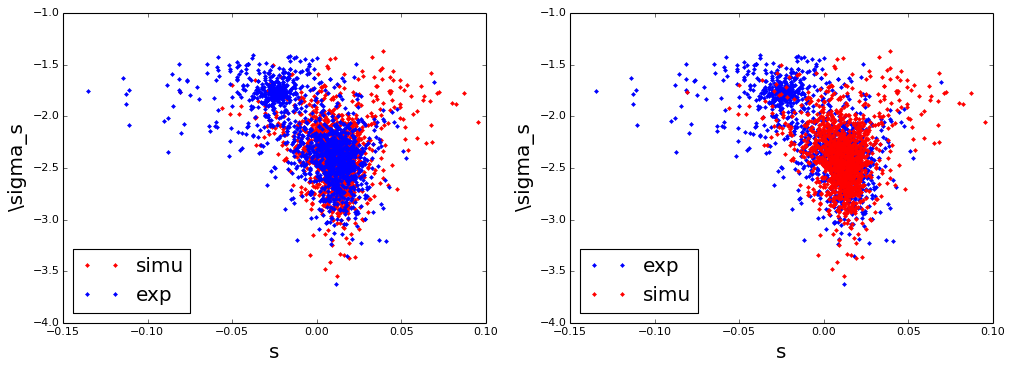

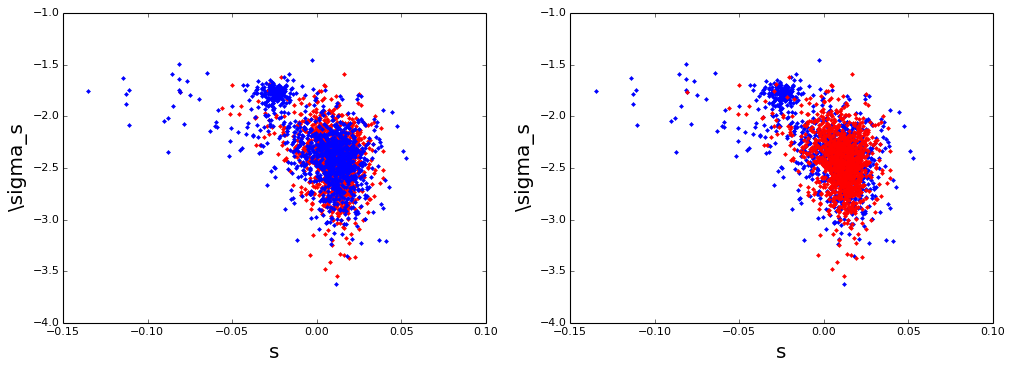

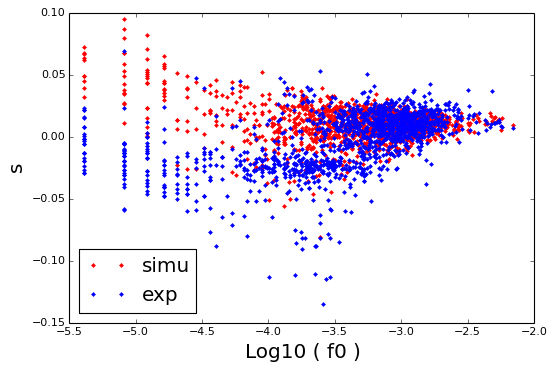

In [24]:

# plot s_std to s
plt.figure(num=None, figsize=(15, 5), dpi=80)
plt.plot([2,1,3])
plt.subplot(121)
plt.plot(x.s_record,np.log10(x.s_record_std),'r.',label='simu')
plt.xlabel('s', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.plot(exp_s,np.log10(exp_s_err),'.',label='exp')
plt.legend(loc="best", fontsize=18)
plt.subplot(122)
plt.plot(exp_s,np.log10(exp_s_err),'.',label='exp')
plt.plot(x.s_record,np.log10(x.s_record_std),'r.',label='simu')
plt.xlabel('s', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.legend(loc="best", fontsize=18)

# plot s_std to s
plt.figure(num=None, figsize=(15, 5), dpi=80)
plt.plot([2,1,3])
plt.subplot(121)
for i in range(0,len(x.pvals)):
    if np.log10(x.pvals[i])>-4:
        plt.plot(x.s_record[i],np.log10(x.s_record_std[i]),'r.')
plt.xlabel('s', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
for i in range(0,len(exp_ini_freq)):
    if np.log10(exp_ini_freq[i])>-4:
        plt.plot(exp_s[i],np.log10(exp_s_err[i]),'b.')
#plt.legend(loc="best", fontsize=18)
plt.xlim(-0.15,0.1)
plt.subplot(122)
for i in range(0,len(exp_ini_freq)):
    if np.log10(exp_ini_freq[i])>-4:
        plt.plot(exp_s[i],np.log10(exp_s_err[i]),'b.')
for i in range(0,len(x.pvals)):
    if np.log10(x.pvals[i])>-4:
        plt.plot(x.s_record[i],np.log10(x.s_record_std[i]),'r.')
plt.xlabel('s', fontsize=18)
plt.ylabel('\sigma_s', fontsize=18)
plt.xlim(-0.15,0.1)

# plot s to initial freq
plt.figure(num=None, figsize=(7.5, 5), dpi=80)
plt.plot(np.log10(x.pvals),x.s_record,'r.',label='simu')
plt.plot(np.log10(exp_ini_freq),exp_s,'b.',label='exp')
plt.xlabel('Log10 ( f0 )', fontsize=18)
plt.ylabel('s', fontsize=18)
plt.legend(loc="best", fontsize=18)

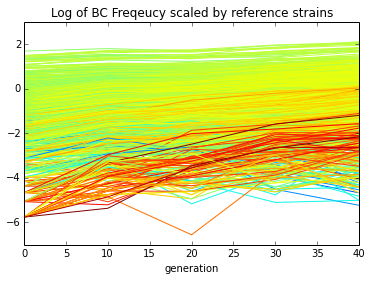

In [7]:
x.plot_scale_freq()

In [8]:
#x.plot_ref_strain()

In [10]:

exps = []
exps_std =[]
do_exp = 1000
#do_exp = 5000

for run in range(0,do_exp):
    x = Dilution(REPLICA, STRAIN, MEDIA, BCID_REF, NEUTRAL,BNSIZE )
    x.read_files()
    #x.get_experimental_s()
    x.runs()
    exps.append(x.s_record)
    exps_std.append(x.s_record_std)
    if run%100==0:
        print run
exps = np.resize(exps,(do_exp,x.N_BCID))
exps_std = np.resize(exps_std,(do_exp,x.N_BCID))
stitle = './output/' + REPLICA + '_' + STRAIN + '_' + MEDIA + '_exps_runs_'+ repr(do_exp) + '_1E5.txt' # output file name
np.savetxt(stitle, (exps,exps_std), fmt='%f')


0
100
200
300
400
500
600
700
800
900


TypeError: float argument required, not numpy.ndarray

In [11]:
stitle = './output/' + REPLICA + '_' + STRAIN + '_' + MEDIA + '_exps_runs_'+ repr(do_exp) + '_1E5.txt' # output file name
np.savetxt(stitle, exps, fmt='%f')
stitle = './output/' + REPLICA + '_' + STRAIN + '_' + MEDIA + '_exps_std_runs_'+ repr(do_exp) + '_1E5.txt' # output file name
np.savetxt(stitle, exps_std, fmt='%f')

In [16]:
# takes time to run s_ave s_var
do_exp = 1000
stitle = './output/' + REPLICA + '_' + STRAIN + '_' + MEDIA + '_exps_runs_'+ repr(do_exp) + '_1E5.txt' # output file name
b = np.loadtxt(stitle, dtype=float)
exps = b
stitle = './output/' + REPLICA + '_' + STRAIN + '_' + MEDIA + '_exps_std_runs_'+ repr(do_exp) + '_1E5.txt' # output file name
b = np.loadtxt(stitle, dtype=float)
exps_std = b
s_arr=[]
sstd_arr=[]
s_ave = [0 for i in range(0,x.N_BCID)]
s_var = [0 for i in range(0,x.N_BCID)]
sstd_ave = [0 for i in range(0,x.N_BCID)]
sstd_var = [0 for i in range(0,x.N_BCID)]
for bc in range(0,x.N_BCID):
    s = []
    std=[]
    for do in range(0,do_exp):
        ss = exps[do][bc]
        if (ss< 100):
            s.append(ss)
            std.append(exps_std[do][bc])
    s_arr.append(s)
    sstd_arr.append(std)
    if len(s) > 10:
        s_ave[bc] = np.mean(s)
        s_var[bc] = np.var(s)
        sstd_ave[bc] = np.mean(std)
        sstd_var[bc] = np.var(std)
#print s_var

In [17]:
x = Dilution(REPLICA, STRAIN, MEDIA, BCID_REF, NEUTRAL,BNSIZE)
x.read_files()
x.get_experimental_s()
x.runs()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


0.724760892667


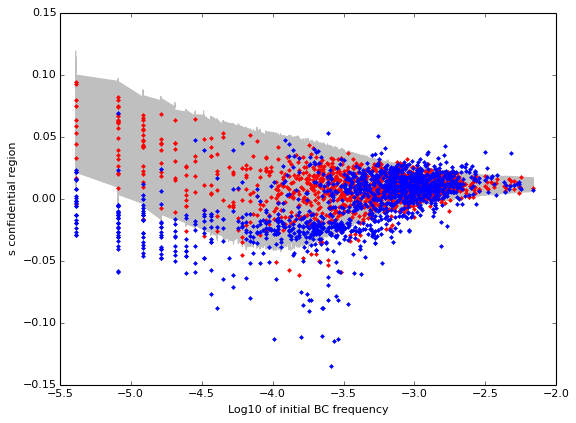

In [18]:
# plot confidence region
xx = np.log10(x.pvals)
yy = np.add(s_ave,2*np.sqrt(s_var)) # up confidence
yy1 = np.subtract(s_ave,2*np.sqrt(s_var)) # down confidence
xx2 = []
xx2.extend(xx[::-1]), xx2.extend(xx)
yy3 = []
yy3.extend(yy1[::-1]),yy3.extend(yy)
fig, ax = plt.subplots(num=None, figsize=(8, 6), dpi=80)
ax.fill(xx2, yy3, color = '0.75')
plt.xlabel("Log10 of initial BC frequency")
plt.ylabel("s confidential region")
#s_ref = -1 * x.S_REF * np.ones((len(x.pvals),1)) 
#plt.plot(xx,s_ref,'g',label = '- s_Ref')
plt.legend()
# add experimental points # first get the initial freq
exp_ini_freq = x.s_inifreq
exp_s = x.s_slope
exp_s_err = x.s_stderr
plt.plot(xx,x.s_record,'r.')
print len(exp_s)/len(x.s_record)
plt.plot(np.log10(exp_ini_freq),exp_s,'b.')
#plt.xlim(-4, -2.5)
#plt.ylim(-0.04, 0.04)
plt.show()
#print exp_s

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


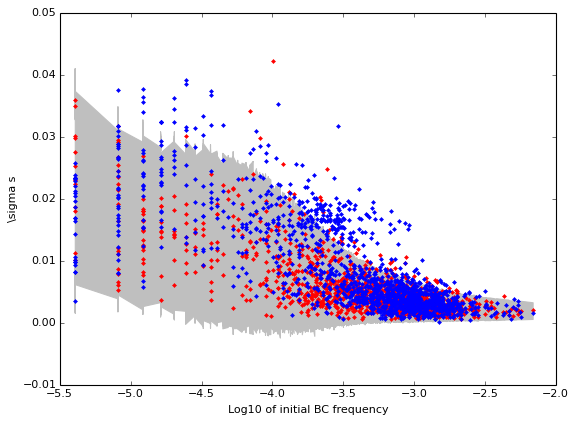

In [20]:
# plot confidence region
xx = np.log10(x.pvals)
yy = np.add(sstd_ave,2*np.sqrt(sstd_var)) # up confidence
yy1 = np.subtract(sstd_ave,2*np.sqrt(sstd_var)) # down confidence
xx2 = []
xx2.extend(xx[::-1]), xx2.extend(xx)
yy3 = []
yy3.extend(yy1[::-1]),yy3.extend(yy)
fig, ax = plt.subplots(num=None, figsize=(8, 6), dpi=80)
ax.fill(xx2, yy3, color = '0.75')
plt.xlabel("Log10 of initial BC frequency")
plt.ylabel("\sigma s")
#s_ref = -1 * x.S_REF * np.ones((len(x.pvals),1)) 
#plt.plot(xx,s_ref,'g',label = '- s_Ref')
plt.legend()
# add experimental points # first get the initial freq
exp_ini_freq = x.s_inifreq
exp_s = x.s_slope
exp_s_err = x.s_stderr
plt.plot(xx,x.s_record_std,'r.')
#print len(exp_s)/len(x.s_record)
plt.plot(np.log10(exp_ini_freq),exp_s_err,'b.')
#plt.xlim(-4, -2.5)
#plt.ylim(-0.04, 0.04)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


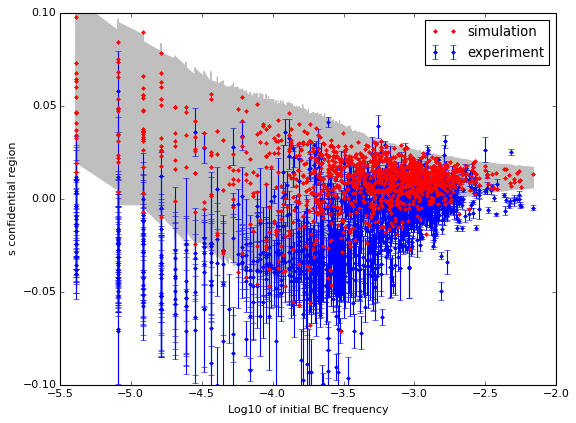

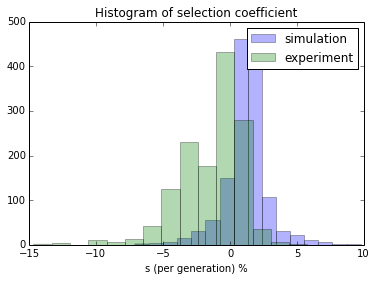

In [15]:

s_simu=x.s_record
ini_simu =x.pvals
#ran_arr = np.random.rand(len(x.s_record),1)
#ran_arr = ran_arr < ( len(exp_s)/len(x.s_record))
#for i in range(0,len(x.s_record)):
#    if ran_arr[i]:
#        s_simu.append(x.s_record[i])
#        ini_simu.append(x.pvals[i])

fig, ax = plt.subplots(num=None, figsize=(8, 6), dpi=80)
ax.fill(xx2, yy3, color = '0.75')
plt.xlabel("Log10 of initial BC frequency")
plt.ylabel("s confidential region")
#s_ref = -1 * x.S_REF * np.ones((len(x.pvals),1)) 
#plt.plot(xx,s_ref,'g',label = '- s_Ref')
plt.errorbar(np.log10(exp_ini_freq),exp_s, yerr= exp_s_err, fmt='b.', label = 'experiment')
plt.plot(np.log10(ini_simu),s_simu,'r.', label = 'simulation')
#plt.xlim(-3, -1.5)
plt.ylim(-0.1, 0.1)
plt.legend()
plt.show()


# plot hist together
UPBOUND, s_plot = x.sort_s_for_plot(s_simu)
UPBOUND2, s_plot2 = x.sort_s_for_plot(x.s_slope)
plt.figure()
s_percent = [100*s_plot[i] for i in range(0,UPBOUND)]
s_percent2 = [100*s_plot2[i] for i in range(0,UPBOUND2)]
plt.hist(s_percent, 16, label = 'simulation', alpha=0.3)
plt.hist(s_percent2, 15, label= 'experiment', alpha=0.3)
plt.title('Histogram of selection coefficient')
plt.xlabel('s (per generation) %')
plt.legend()
plt.show()

s mean 0.050011827580618166
s width 0.056149514315224178


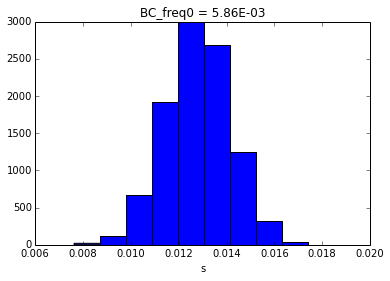

s mean 0.012801586700000032
s width 0.0027059210472466528


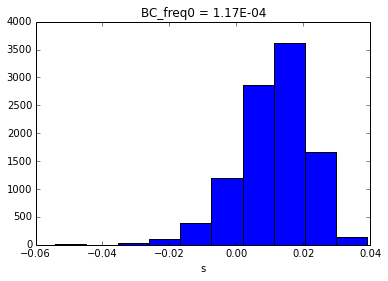

s mean 0.011099560499999966
s width 0.02080176854525018


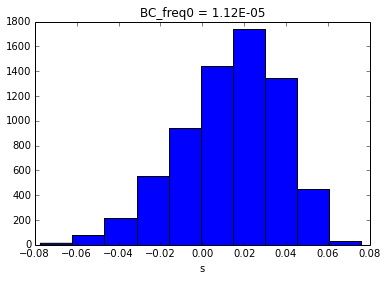

In [79]:
# plot histogram of s for a bcid
index = [1, 1100, 1400]
for n in index:
    print "s mean "+ repr(np.mean(yy))
    print "s width "+ repr(2*np.sqrt(np.var(yy)))
    plt.figure()
    yy = s_arr[n]
    plt.hist(yy)
    plt.xlabel("s")
    plt.title("BC_freq0 = {0:0.2E}".format(x.pvals[n]))
    plt.show()

In [63]:
# output s_ave s_var
stitle = './output/' + REPLICA + '_' + STRAIN + '_' + MEDIA + '_s_confidence_runs_10000' + '.txt' # output file name
fout = open(stitle,'w')
orig_stdout = sys.stdout  #using system to 'print' to ouput file
sys.stdout = fout
print 'initial_BC_Freq \t s_mean \t s_var'
for n in range(0,len(x.pvals)):
    print repr(x.pvals[n])+' \t'+repr(s_ave[n])+'\t'+repr(s_var[n])
sys.stdout = orig_stdout
fout.close()

In [11]:
tmp = x.s_dat[0].split()
print tmp[0]

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [56]:
dat = []
for i in range(0,10):
    tmp =x.s_dat[i].split()
    tmp = tmp[0]
    #print tmp[0]
    tmp2 = tmp.split(',')
    #print tmp2
    dat.extend(tmp2)
print dat
dat = np.resize(dat,(10,7))
print dat[1][2]

['"Mut_ID"', '"BC_ID"', '"Environment"', '"Strain"', '"Slope"', '"Intercept"', '"R^2"', '"1012"', '"30"', '"1_SC3"', '"DivAnc"', '"-0.00517760017238334"', '"-0.4502740719686"', '"0.0566721489790643"', '"1012"', '"30"', '"1_SC3"', '"L003"', '"0.000459220907895832"', '"-0.41345317814374"', '"0.000936600678377192"', '"1012"', '"30"', '"1_SC5"', '"DivAnc"', '"-0.00588391625608334"', '"-2.17068063472"', '"0.34574861273384"', '"1012"', '"30"', '"1_SC5"', '"L003"', '"-0.00839809939783334"', '"-1.06676556917"', '"0.667974223318315"', '"1012"', '"30"', '"1_SC5"', '"L094"', '"0.000759673153333335"', '"-4.002929153256"', '"0.0359049015756322"', '"1012"', '"30"', '"1_SC7"', '"DivAnc"', '"-0.0505538488679167"', '"-0.687263845080001"', '"0.770280646298097"', '"1012"', '"30"', '"1_SC7"', '"L003"', '"-0.046828789930375"', '"-0.870240304822999"', '"0.881674661735075"', '"1012"', '"30"', '"1_YPD"', '"DivAnc"', '"-0.0137688975062083"', '"-1.307688709041"', '"0.872289286057409"', '"1012"', '"30"', '"1_YPD

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



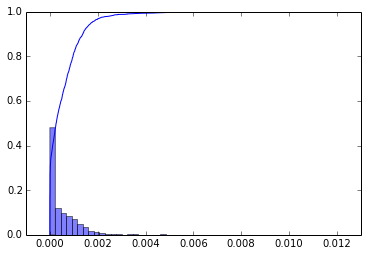

(-0.001, 0.013)

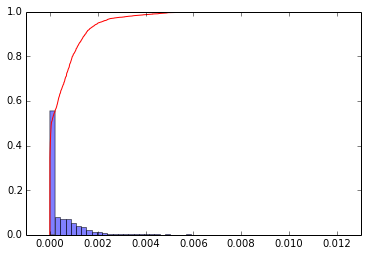

In [12]:
import matplotlib.pyplot as plt
ini_sorted = np.sort(x.pvals)
p = 1. * np.arange(len(x.pvals)) / (len(x.pvals) - 1)
weights = np.ones_like(ini_sorted)/float(len(ini_sorted))
plt.hist(ini_sorted,30,weights=weights,alpha=0.5)
plt.plot(ini_sorted,p,'b')
plt.xlim(-0.001,0.013)
plt.show()
final_freq = x.bc_count[4][0:-1]/float(x.all_count[4])
final_sorted = np.sort(final_freq)
weights = np.ones_like(final_sorted)/float(len(final_sorted))
p = 1. * np.arange(len(final_freq)) / (len(final_freq) - 1)
plt.figure()
plt.hist(final_sorted,60,weights=weights,alpha=0.5)
plt.plot(final_sorted,p,'r')
plt.xlim(-0.001,0.013)

In [64]:
print max(x.pvals)*100,'%'

print max(final_freq)*100,'%'


0.691775557264 %
1.31185984394 %


In [33]:
print np.sum(x.simu_reads[4]/float(x.all_count[4]))

0.999766546785


In [36]:
x.all_count

[245889, 1151113, 635297, 881222, 950940]

In [37]:
1/245889

4.066875704077857e-06